### Brief

The goal of this assignment was to compare machine learning models studied in class on a dataset of choice. Models studied included both regressors and classifiers, which informed the models chosen for this study. 

### Introduction

What is the best machine learning algorithm for predicting the popularity of music?

The last 30 years of the information age have radically changed how we access music. The creation, distribution and proliferation of music has never been easier, resulting in an information overload typical of the attention economy. In short, there is often too much choice when it comes to enjoying music. At the same time, a core function of the modern platform streaming service is the expectation that recommendations from the platform match what the user wants.

While many models so far have looked into the raw determinants of popularity, few have yet accounted for the fact that initial popularity is usually driven by promotion, and not by discovery. Taking this into account, we would like to know what models can be used to predict which songs would be more popular than others that are already popular. This information is useful given the compounding effect seen in the entertainment industry, where small increments in popularity at high levels yield massive results.

### Libraries

In [179]:
# Visualizations
import pandas as pd
import numpy as np
import datetime
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
#

In [180]:
# For transformations and predictions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models to be used, all from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Transformers
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import pairwise_distances
from six import StringIO

# For comparing metrics
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split



### Loading the data

In [181]:
df = pd.read_csv(r'C:\Users\tekul\Downloads\Spotify-2000.csv')

In [182]:
df.head(1000)


Index                              Title             Artist  \
0        1                            Sunrise        Norah Jones   
1        2                        Black Night        Deep Purple   
2        3                     Clint Eastwood           Gorillaz   
3        4                      The Pretender       Foo Fighters   
4        5             Waitin' On A Sunny Day  Bruce Springsteen   
..     ...                                ...                ...   
995    996                    Show Me The Way     Peter Frampton   
996    997           Meeting Across the River  Bruce Springsteen   
997    998                   Love Is The Drug         Roxy Music   
998    999  Still Crazy After All These Years         Paul Simon   
999   1000   Hotel California - 2013 Remaster             Eagles   

               Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
0        adult standards  2004                     157      30            53   
1             album rock  2000                     135      79            50   
2    alternative hip hop  2001                     168      69            66   
3      alternative metal  2007                     173      96            43   
4           classic rock  2002                     106      82            58   
..                   ...   ...                     ...     ...           ...   
995           album rock  1975                     130      73            70   
996         classic rock  1975                     105      29            46   
997           album rock  1975                     125      76            84   
998         classic rock  1975                      37      25            27   
999           album rock  1976                     147      51            58   

     Loudness (dB)  Liveness  Valence Length (Duration)  Acousticness  \
0              -14        11       68               201            94   
1              -11        17       81               207            17   
2               -9         7       52               341             2   
3               -4         3       37               269             0   
4               -5        10       87               256             1   
..             ...       ...      ...               ...           ...   
995             -8        10       64               243            43   
996            -10        18       26               197            82   
997             -5         3       60               251             6   
998            -12         9       13               207            80   
999             -9         6       61               391             1   

     Speechiness  Popularity  
0              3          71  
1              7          39  
2             17          69  
3              4          76  
4              3          59  
..           ...         ...  
995            3          66  
996            3          43  
997            9          60  
998            4          61  
999            3          82  

[1000 rows x 15 columns]

# Preprocessing of data:


Since duplicates will not aid the model, they will be dropped. We will also check for any null values that may effect the one-hot encoding process later on.

In [183]:
df.isnull().sum()
#no nulls, allgood

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [184]:
print(len(df.index))

1994


In [185]:
df = df.iloc[0:2000]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [190]:
df.head()

Index                   Title             Artist            Top Genre  \
0      1                 Sunrise        Norah Jones      adult standards   
1      2             Black Night        Deep Purple           album rock   
2      3          Clint Eastwood           Gorillaz  alternative hip hop   
3      4           The Pretender       Foo Fighters    alternative metal   
4      5  Waitin' On A Sunny Day  Bruce Springsteen         classic rock   

   Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0  2004                     157      30            53            -14   
1  2000                     135      79            50            -11   
2  2001                     168      69            66             -9   
3  2007                     173      96            43             -4   
4  2002                     106      82            58             -5   

   Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity  
0        11       68               201            94            3          71  
1        17       81               207            17            7          39  
2         7       52               341             2           17          69  
3         3       37               269             0            4          76  
4        10       87               256             1            3          59

In [69]:
df[df["Length (Duration)"].str.contains(",")==True]
#There were some non-numeric values contained in the duration column, that should have been measured in milliseconds

Index                                              Title      Artist  \
842     843                                             Echoes  Pink Floyd   
904     905  Close to the Edge (i. The Solid Time of Change...         Yes   
951     952                           Autobahn - 2009 Remaster   Kraftwerk   
1982   1983                                          Get Ready  Rare Earth   

       Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
842   album rock  1971                     134      32            28   
904   album rock  1972                      81      60            22   
951   dance rock  1974                      82      50            33   
1982  blues rock  1969                     127      87            41   

      Loudness (dB)  Liveness  Valence Length (Duration)  Acousticness  \
842             -17        11       14             1,412            37   
904             -11        41       25             1,121            27   
951             -16        13       11             1,367            11   
1982             -6        83       65             1,292             0   

      Speechiness  Popularity  
842             4          58  
904             6          47  
951             4          48  
1982            4          45

In [70]:
df["Length (Duration)"] = df["Length (Duration)"].replace(["1,412","1,121","1,367","1,292"],['1412','1121','1367','1292'])
#These were corrected manually

In [71]:
df["Length (Duration)"] = df["Length (Duration)"].astype(np.int64)
#Casting all values to integers

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [73]:
columns = ['Index', 'Title']
for col in columns:
  print(f'{col:<15}: {df[col].nunique()} unique values')

Index          : 1994 unique values
Title          : 1958 unique values


### Dropping columns and final cleaning

As the purpose of this exercise is to find out which ML-models best classify the popularity of a given song, we need to only include columns in the dataframe that are actually useful for classification. Without strong evidence but intuition withstanding, song titles were dropped from the classifier.

In [ ]:
#Remove values which we will not be associating in the classifier

In [74]:
df = df.drop(labels=['Index', 'Title'], axis=1)


df.shape

(1994, 13)

In [75]:
df.duplicated().sum()
#No duplicates

0

In [76]:
df.isnull().sum().sum()
#No null values

0

### Corelation

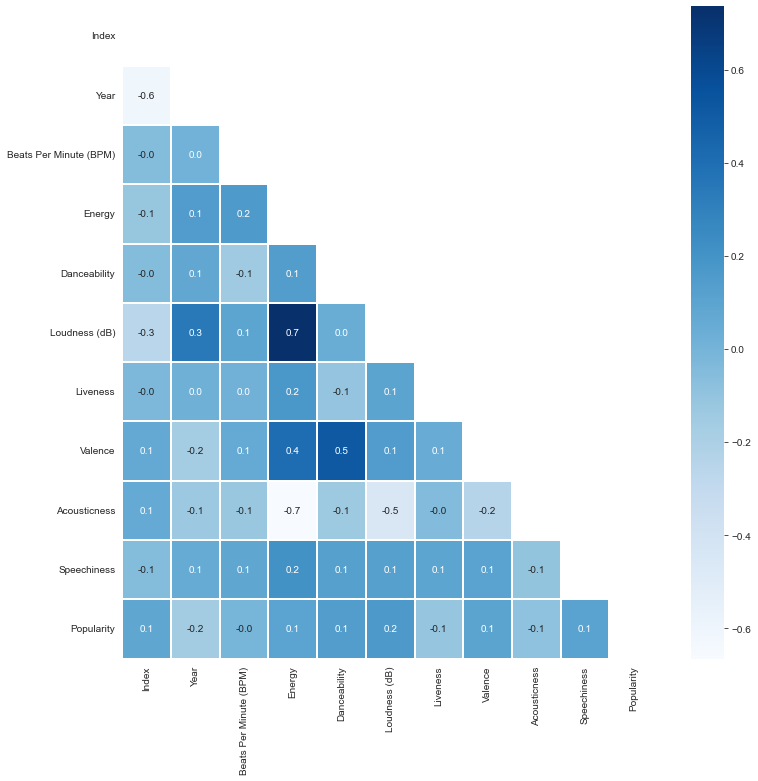

In [189]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

#### Data Visualization

Dropped, unhelpful

#### Artist

It is rather obvious that artist will be a fantastic indicator of song popularity, and as such they will be one-hot encoded as a classifier. It is worth noting that amongst 1994 songs, there are only 731 unique values. This is mostly due to Beatlemania, for lack of better phenomena.

In [77]:
df['Artist'].nunique()

731

In [26]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

In [79]:
df['mean'] = df.groupby('Artist')['Popularity'].transform('mean')
df['count'] = df.groupby('Artist')['Popularity'].transform('count')
# plotting
fig, ax = plt.subplots(figsize = (20, 4))
ax = sns.histplot(df['count'], bins = 200)
ax.set_xlabel('Count of apperances in data', fontsize=12, c='r')
ax.set_ylabel('Count of artists', fontsize=12, c='r')
ax.set_title('Artist Distribution in Dataframe', c='r', fontsize=14, weight = 'bold')
plt.show()

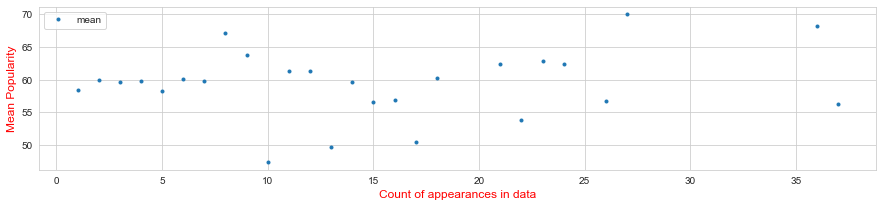

In [80]:
fig, ax = plt.subplots(figsize = (15, 3))
stat = df.groupby('count')['mean'].mean().to_frame().reset_index()
ax = stat.plot(x='count', y='mean', marker='.', linestyle = '', ax=ax)
ax.set_xlabel('Count of appearances in data', fontsize=12, c='r')
ax.set_ylabel('Mean Popularity', fontsize=12, c='r')
plt.show()

#### Year

Well distributed, with obviously more popular music coming out from the 1970s onwards. It would be good to one day regress this data against the economic cycle. As expected, this distribution mirrors our findings with the artists' exploration. One can easily see where Beatles, Queen and Coldplay albums appear

In [81]:
fig, ax = plt.subplots(figsize=(17, 4))
ax = sns.histplot(df['Year'], bins = 100, kde = False)
ax.set_xlim(1920,2020)
ax.set_xticks(range(1920, 2021, 10))
ax.set_title('# of tracks per Year')
plt.show()

In [82]:
#check for uniformity each year
df.groupby('Year')['Year'].count()

Year
1956     1
1958     5
1959     3
1960     1
1961     1
        ..
2015    42
2016    35
2017    45
2018    52
2019    21
Name: Year, Length: 63, dtype: int64

In [31]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('Year')['Popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Year', c='r', fontsize=12)
ax.set_title('20 Most Popular Years in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Year')

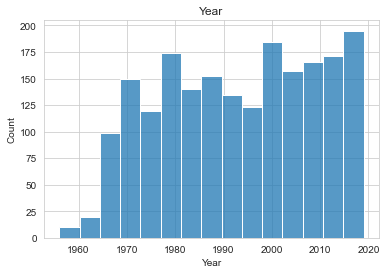

In [83]:
sns.histplot(df['Year']).set_title('Year')

#### Top Genre

Upon exploration, this column was dropped due to poor explanatory data. A lot of Bruce Springsteen's greatest hits laballed as 'album rock' clouded the actual genres to explore. Without a secondary label, we could not relabel the songs in the 'album rock' category

In [84]:
df['Top Genre'].nunique()

149

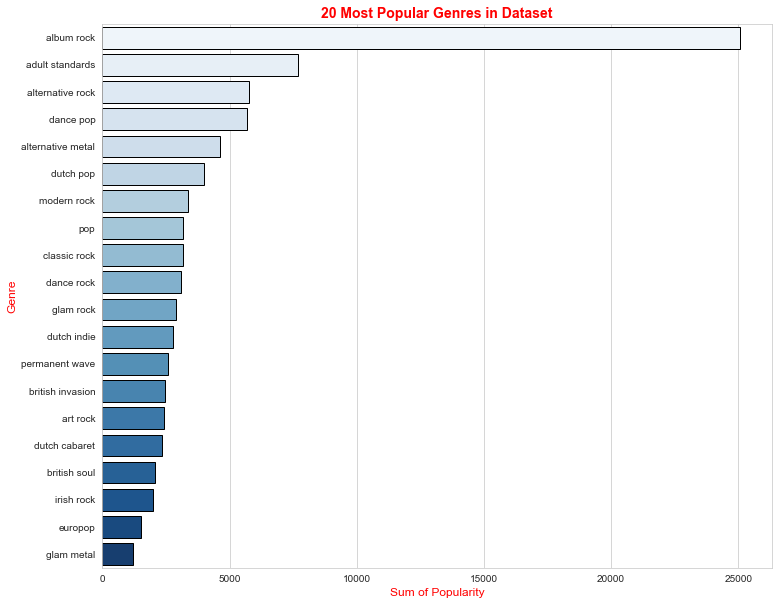

In [34]:
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df.groupby('Top Genre')['Popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Genre', c='r', fontsize=12)
ax.set_title('20 Most Popular Genres in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

In [85]:
df.pop("Top Genre")

0           adult standards
1                album rock
2       alternative hip hop
3         alternative metal
4              classic rock
               ...         
1989        adult standards
1990        adult standards
1991             blues rock
1992                  bebop
1993        adult standards
Name: Top Genre, Length: 1994, dtype: object

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Artist                  1994 non-null   object 
 1   Year                    1994 non-null   int64  
 2   Beats Per Minute (BPM)  1994 non-null   int64  
 3   Energy                  1994 non-null   int64  
 4   Danceability            1994 non-null   int64  
 5   Loudness (dB)           1994 non-null   int64  
 6   Liveness                1994 non-null   int64  
 7   Valence                 1994 non-null   int64  
 8   Length (Duration)       1994 non-null   int64  
 9   Acousticness            1994 non-null   int64  
 10  Speechiness             1994 non-null   int64  
 11  Popularity              1994 non-null   int64  
 12  mean                    1994 non-null   float64
 13  count                   1994 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memo

#### BPM 

What it says on the box, with an expected normal distribution

Text(0.5, 1.0, 'Beats Per Minute (BPM)')

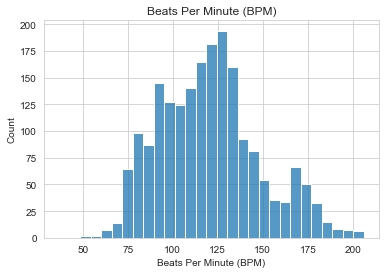

In [87]:
sns.histplot(df['Beats Per Minute (BPM)']).set_title('Beats Per Minute (BPM)')
#normally distributed, looks alright

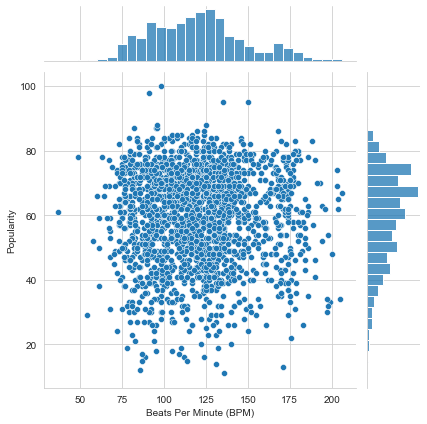

In [88]:
#Nothing to see here
sns.jointplot(x = 'Beats Per Minute (BPM)', y = 'Popularity', data = df)


#### Energy

One of Spotify's own indexes, likely a combination of BPM and volume differentiations across the duration of the song. Other than that, what it says on the box.

Text(0.5, 1.0, 'Energy')

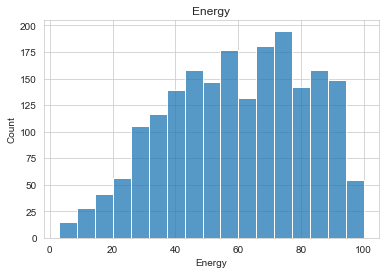

In [89]:
sns.histplot(df['Energy']).set_title('Energy')


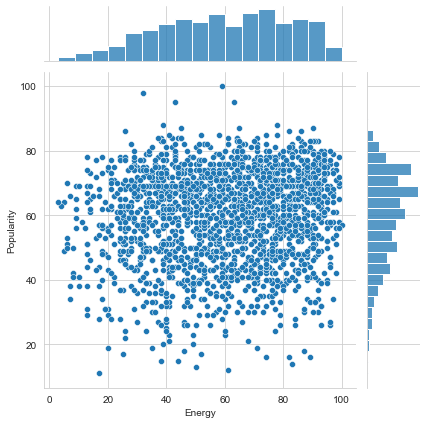

In [90]:
sns.jointplot(x = 'Energy', y = 'Popularity', data = df)

#### Danceability

Another of Spotify's own indexes, which is again, likely a combination of BPM over duration

Text(0.5, 1.0, 'Danceability Distribution')

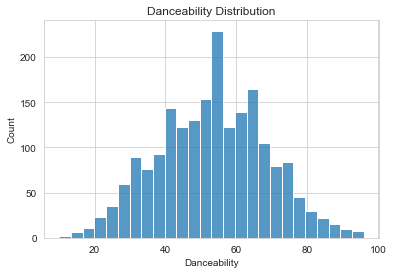

In [91]:
sns.histplot(df['Danceability']).set_title('Danceability Distribution')

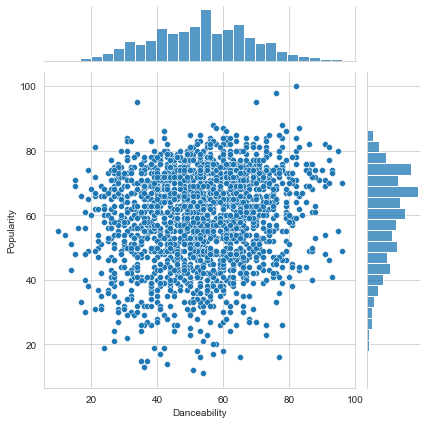

In [92]:
sns.jointplot(x = 'Danceability', y = 'Popularity', data = df)

In [93]:
#One of the better predictors
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax = sns.scatterplot(x='Danceability', y='Popularity', data=df, color='blue', ax=ax)
ax.set_title('Danceability')
ax.set_ylabel('Popularity Popularity', fontsize=12)
plt.tight_layout()
plt.show()

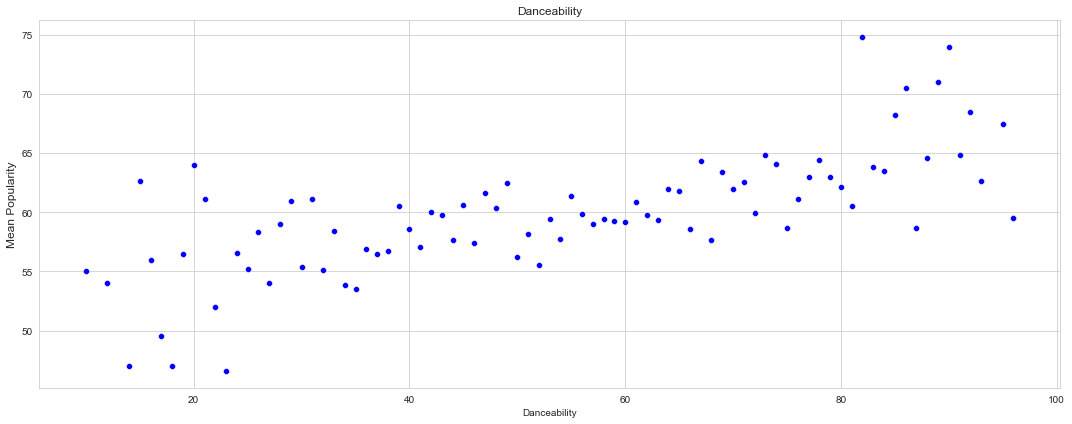

In [94]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  df.groupby('Danceability')['Popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='Danceability', y='Popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('Danceability')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

In [95]:
df.groupby('Danceability')['Popularity'].mean().to_frame().reset_index()

Danceability  Popularity
0             10   55.000000
1             12   54.000000
2             14   47.000000
3             15   62.666667
4             16   56.000000
..           ...         ...
79            91   64.800000
80            92   68.500000
81            93   62.666667
82            95   67.500000
83            96   59.500000

[84 rows x 2 columns]

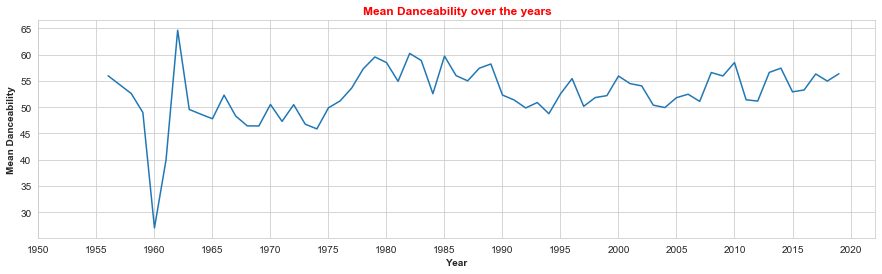

In [96]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = df.groupby('Year')['Danceability'].mean().plot()
ax.set_title('Mean Danceability over the years', c='r', weight='bold')
ax.set_ylabel('Mean Danceability', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1950, 2021, 5))
plt.show()

#### Loudness (dB) 

As is

Text(0.5, 1.0, 'Loudness (dB)')

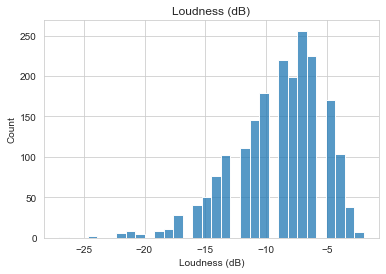

In [97]:
sns.histplot(df['Loudness (dB)']).set_title('Loudness (dB)')

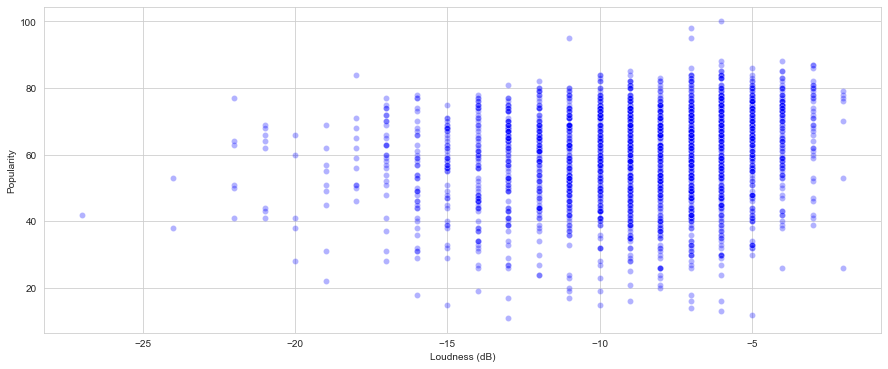

In [98]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='Loudness (dB)', y='Popularity', data=df, color='blue', alpha=0.3)
plt.show()


#### Liveness

One of Spotify's of own predictors - a measure of how likely a given song is to be recorded live - some very popular songs have live versions which benefit from the effect of interpolation. E.g., Bruce Springsteen again...

Text(0.5, 1.0, 'Liveness')

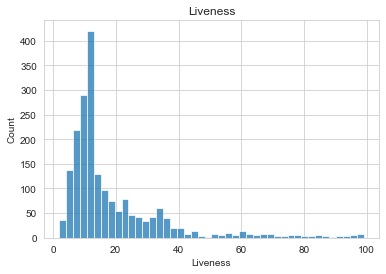

In [99]:
#Most songs are not live...! What a surprise
sns.histplot(df['Liveness']).set_title('Liveness')

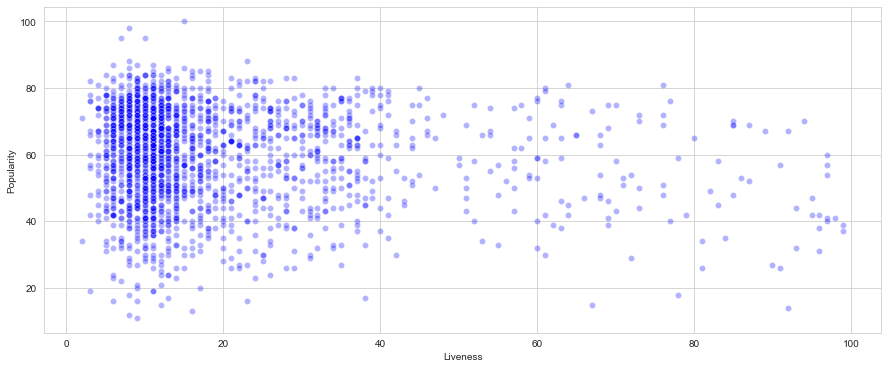

In [100]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='Liveness', y='Popularity', data=df, color='blue', alpha=0.3)
plt.show()

#### Valence

One of Spotify's more dubious indexes, the likelihood the song is happy-sounding: https://community.spotify.com/t5/Spotify-for-Developers/Valence-as-a-measure-of-happiness/td-p/4385221

Text(0.5, 1.0, 'Valence')

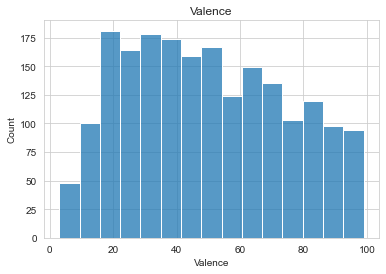

In [101]:
sns.histplot(df['Valence']).set_title('Valence')

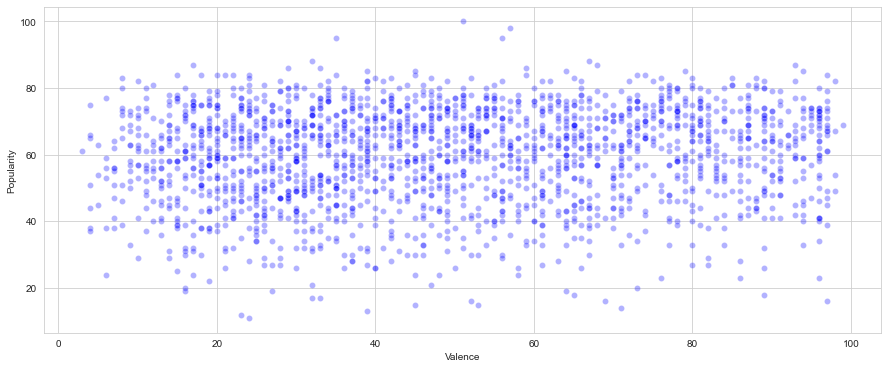

In [102]:
#Nothing to see here, people like both happy and sad songs
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='Valence', y='Popularity', data=df, color='blue', alpha=0.3)
plt.show()

#### Length (Duration) in ms

In [103]:
sns.histplot(df['Length (Duration)']).set_title('Length (Duration)')

Text(0.5, 1.0, 'Length (Duration)')

In [54]:
#Obvious groupings
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='Length (Duration)', y='Popularity', data=df, color='blue', alpha=0.3)
plt.show()

#### Acousticness

Very helpful piece of data to have, a measure of whether the song is acoustically produced. This should be able to distinguish Jack Johnson from Skrillex.

In [104]:
sns.histplot(df['Acousticness']).set_title('Acousticness')

Text(0.5, 1.0, 'Acousticness')

In [105]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='Acousticness', y='Popularity', data=df, color='blue', alpha=0.3)
plt.show()

#### Speechiness

One of Spotify's indexes that tells whether the song has lyrics or not, and how many. As can be seen, a lot do.

In [106]:
sns.histplot(df['Speechiness']).set_title('Speechiness')

Text(0.5, 1.0, 'Speechiness')

In [107]:
#Probably not going to be helpful but okay to keep in
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='Speechiness', y='Popularity', data=df, color='blue', alpha=0.3)
plt.show()

#### Popularity: Target

This is a complex composite index based on moving averages with a scale from 1-100, which is static at the time of retrieval. A song at 100 is the most popular, a song at 50 is averagely popular. The statistic behind this target variable is dubious at best (questions remain how it is constructed and what data feeds into it, such as listens) but it is still useful for target classification, as the exploration reveals.

In [108]:
df['Popularity'].describe()

count    1994.00000
mean       59.52658
std        14.35160
min        11.00000
25%        49.25000
50%        62.00000
75%        71.00000
max       100.00000
Name: Popularity, dtype: float64

Text(0.5, 1.0, 'Popularity Distribution')

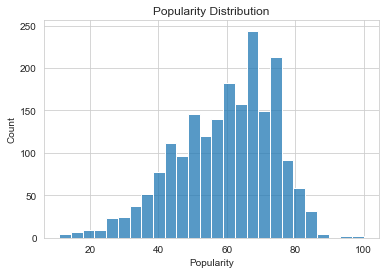

In [109]:
sns.histplot(df['Popularity']).set_title('Popularity Distribution')

In [110]:
df[df['Popularity']==0]

Empty DataFrame
Columns: [Artist, Year, Beats Per Minute (BPM), Energy, Danceability, Loudness (dB), Liveness, Valence, Length (Duration), Acousticness, Speechiness, Popularity, mean, count]
Index: []

In [112]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = df.groupby('Year')['Popularity'].mean().plot()
ax.set_title('Mean Popularity over the years', c='r', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Year', weight='bold')
ax.set_xticks(range(1950, 2021, 5))
plt.show()

The Beatles' outpaced influence can also be seen here. Songs recorded in the 1960s appear to be absolute classics without denial, with a general decline in mean popularity over the years...!

In [113]:
df.pop("mean")
df.pop("count")

0        2
1        4
2        2
3        9
4       23
        ..
1989    17
1990    17
1991     1
1992     1
1993     1
Name: count, Length: 1994, dtype: int64

### Initial correlations

An initial numeric comparison for correlation was conduted using the seaborn heatmap, with the non-numeric variables omitted.

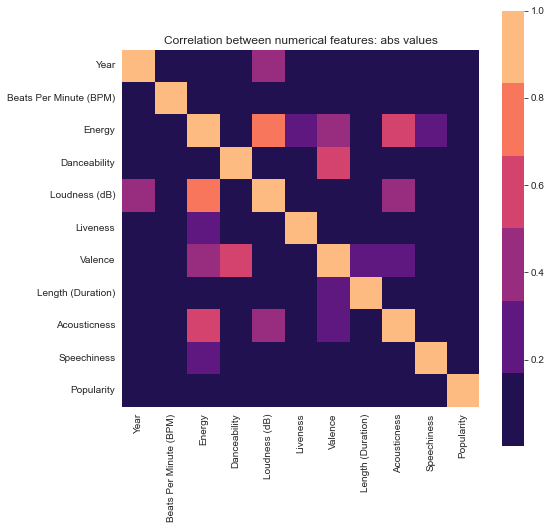

In [114]:
numeric_columns = df.columns[df.dtypes != 'object']
string_columns = df.columns[df.dtypes == 'object']
numeric_df = pd.DataFrame(data=df, columns=numeric_columns, index=df.index)
corr = np.abs(numeric_df.corr())
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features: abs values')
plt.show()

#### Results of initial numeric correlation

Shows that all features are rubbish at explaining the target variable, popularity:

In [115]:
series = np.abs(corr['Popularity']).sort_values(ascending=False)
print('The most linear correlated features to POPULARITY are:')
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

The most linear correlated features to POPULARITY are:
Loudness (dB)     -->  0.17 (abs)
Year              -->  0.16 (abs)
Danceability      -->  0.14 (abs)
Liveness          -->  0.11 (abs)
Speechiness       -->  0.11 (abs)
Energy            -->  0.10 (abs)


### Feature Engineering

In order to create an arbitrary classifier of more-popular against less-popular, a 50/50 quantile cut was used to form classifiers for the target popularity variable. More popular songs were given a classification of '1' and the least popular songs were given a '0'. 

Given that this cut was conducted on a dataset of already popular songs, the value for this kind of division is solely within the granularity achieved when there are no good variable predictors and a ML model considering multiple variables must be used to classify popularity.

In [116]:
df['Popularity'].describe()

count    1994.00000
mean       59.52658
std        14.35160
min        11.00000
25%        49.25000
50%        62.00000
75%        71.00000
max       100.00000
Name: Popularity, dtype: float64

In [117]:
df['Popularity'] = pd.qcut(df['Popularity'], q=2, labels=[0, 1])

In [118]:
df["Popularity"].value_counts()

0    1039
1     955
Name: Popularity, dtype: int64

In [119]:
df['Popularity']

0       1
1       0
2       1
3       1
4       0
       ..
1989    1
1990    1
1991    1
1992    1
1993    0
Name: Popularity, Length: 1994, dtype: category
Categories (2, int64): [0 < 1]

#### One-hot encoding

Artist values were one-hot encoded using pandas' get dummies function.

In [120]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [121]:
#one hot encoding the genre and artists
df = onehot_encode(df, 'Artist', 'artist')

In [122]:
df

Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  \
0     2004                     157      30            53            -14   
1     2000                     135      79            50            -11   
2     2001                     168      69            66             -9   
3     2007                     173      96            43             -4   
4     2002                     106      82            58             -5   
...    ...                     ...     ...           ...            ...   
1989  1958                      94      21            70            -12   
1990  1958                     175      76            36             -8   
1991  1959                     168      80            53             -9   
1992  1959                     174      26            45            -13   
1993  1959                     133      50            49            -10   

      Liveness  Valence  Length (Duration)  Acousticness  Speechiness  ...  \
0           11       68                201            94            3  ...   
1           17       81                207            17            7  ...   
2            7       52                341             2           17  ...   
3            3       37                269             0            4  ...   
4           10       87                256             1            3  ...   
...        ...      ...                ...           ...          ...  ...   
1989        11       72                128            84            7  ...   
1990        76       95                136            73            6  ...   
1991        31       97                162            74            7  ...   
1992         7       60                324            54            4  ...   
1993        16       83                148            74            3  ...   

     artist_Yann Tiersen  artist_Yes  artist_Youp van 't Hek  \
0                      0           0                       0   
1                      0           0                       0   
2                      0           0                       0   
3                      0           0                       0   
4                      0           0                       0   
...                  ...         ...                     ...   
1989                   0           0                       0   
1990                   0           0                       0   
1991                   0           0                       0   
1992                   0           0                       0   
1993                   0           0                       0   

      artist_Youssou N'Dour  artist_Yusuf / Cat Stevens  artist_ZZ Top  \
0                         0                           0              0   
1                         0                           0              0   
2                         0                           0              0   
3                         0                           0              0   
4                         0                           0              0   
...                     ...                         ...            ...   
1989                      0                           0              0   
1990                      0                           0              0   
1991                      0                           0              0   
1992                      0                           0              0   
1993                      0                           0              0   

      artist_Zucchero  artist_a-ha  artist_blink-182  artist_Édith Piaf  
0                   0            0                 0                  0  
1                   0            0                 0                  0  
2                   0            0                 0                  0  
3                   0            0                 0                  0  
4                   0            0                 0                  0  
...               ...          ...               ...              

### Splitting into Train and Test

In [123]:
y = df.loc[:, 'Popularity']
X = df.drop('Popularity', axis=1)

In [124]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [125]:
#random = 369
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)

In [126]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1395, 741)
X_test:  (599, 741)
y_train:  (1395,)
y_test:  (599,)


### Preliminary Regression

The data was split into train and test segments at the train = 0.7 mark with an initial random state = 369. This random state was changed on subsequent runs to compare initial findings. Alongside the benchmark logistic regression model, three other models were chosen as initial contenders for comparison. Since we are conducting a classification exercise, the natural candidates were:
1. Logistic Regression model (benchmark)
2. K-nearest-neighbors (KNN) model
3. Decision-Tree Classifier 


To speculate on initial default parameter results, all models were run on the training and data as shown below.

In [127]:
log_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()


In [128]:
log_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dec_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [129]:
log_acc = log_model.score(X_test, y_test)
knn_acc = knn_model.score(X_test, y_test)
dec_acc = dec_model.score(X_test, y_test)


In [131]:
print("Logistic Regression Accuracy:", log_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Accuracy:", dec_acc)


Logistic Regression Accuracy: 0.6944908180300501
K-Nearest-Neighbors Accuracy: 0.6293823038397329
Decision Tree Accuracy: 0.5943238731218697


In [132]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree"],
    y=[log_acc, knn_acc, dec_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()

### Preliminary Results

Given that only all models managed to cross a 50% threshold, all are valid for hyperparameter tuning to produce the most optimized model. 

Afterwards, the most promising models were tested for reliability using a Chi-squared test.

### Hyper-Parameter Tuning

For the Logistic Regression, Decision Tree a grid search cross-validation was performed to find the best parameters using the .get_params_ method. These initial F1 accuracy scores were then compared to the optimized models (using best parameters) scores. 

The optimized Logistic Regression experienced a growth in accuracy for both classification labels, with a marginal increase in overall F1 score after optimization.

The Decision Tree failed to optimize with the grid search cross validation and also by selecting a model by looking at decline in RMSE. Other permutations were tested with very little variation, and none was upward in F1 score. While the RMSE leveled out after greater depth, the accuracy score did not increase. As such, this model was dropped from the final analysis. 

The KNN model optimized between values of 5 (the default) and up to 30 using the elbow method of plotting RMSE as seen in Figure 4 . However, while accuracy of classifying 0 or 1 increased, overall F1 accuracy did not significantly increase. 

#### 1. Logistic Regression

In [133]:
logreg = LogisticRegression()
_ = logreg.fit(X_train, y_train)
# print('Intercept:', logreg.intercept_)
# print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:10])
print('Actual type of first five organisms from test split:', y_test[:10])


Predicted type of first five organisms from test split: [1 0 1 1 0 0 0 1 0 0]
Actual type of first five organisms from test split: 853     1
131     0
1666    0
1938    0
112     1
1467    0
480     0
1555    1
1027    0
1329    0
Name: Popularity, dtype: category
Categories (2, int64): [0 < 1]


In [134]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, y_train)

#print(logreg.cv_results_[{'mean_test_score','std_test_score','params'}])
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
0.708 (+/-0.030) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
0.705 (+/-0.028) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
0.706 (+/-0.029) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
0.705 (+/-0.028) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.705 (+/-0.028) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
0.705 (+/-0.028) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
0.705 (+/-0.028) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
0.705 (+/-0.028) for {'C': 10000000.0, 'penalty': 'l2'}


In [135]:
print('\nBest parameters:', logreg.best_params_)


Best parameters: {'C': 1, 'penalty': 'l2'}


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72       321
           1       0.67      0.67      0.67       278

    accuracy                           0.69       599
   macro avg       0.69      0.69      0.69       599
weighted avg       0.69      0.69      0.69       599



In [137]:
logreg_opt = LogisticRegression(penalty='l2',C= 10000000)
_ = logreg_opt.fit(X_train, y_train)
# print('Intercept:', logreg.intercept_)
# print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five songs from test split:', logreg_opt.predict(X_test)[:10])
print('Actual type of first five songs from test split:', y_test[:10])


Predicted type of first five songs from test split: [1 0 1 1 1 0 0 1 0 0]
Actual type of first five songs from test split: 853     1
131     0
1666    0
1938    0
112     1
1467    0
480     0
1555    1
1027    0
1329    0
Name: Popularity, dtype: category
Categories (2, int64): [0 < 1]


In [138]:
print(classification_report(y_test, logreg_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       321
           1       0.67      0.69      0.68       278

    accuracy                           0.70       599
   macro avg       0.70      0.70      0.70       599
weighted avg       0.70      0.70      0.70       599



In [139]:
y_train_pred = logreg_opt.predict(X_train).clip(0, 1)

# RMSE Train
LR_rmse_train_lr = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse_train_lr:.6f}")

#Predicting with the model
y_test_pred = logreg_opt.predict(X_test).clip(0, 1)

# RMSE Test
LR_rmse_test_lr = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse_test_lr:.6f}")

RMSE Train = 0.344959
RMSE Test = 0.549700


In [ ]:
y_train_pred = logreg.predict(X_train).clip(0, 1)

# RMSE Train
LR_rmse_train_lr = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse_train_lr:.6f}")

#Predicting with the model
y_test_pred = logreg.predict(X_test).clip(0, 1)

# RMSE Test
LR_rmse_test_lr = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse_test_lr:.6f}")

##### 1a. Logistic Regression Model Reliability Test with Chi-Sq

Test whether the logistic regression model is a random guesser based on "H0: LogReg Model is not a random guesser"

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)

In [141]:
from scipy.stats import chi2_contingency

y_pred_lr = logreg_opt.predict(X)
y_pred__lr1 = pd.Series(y_pred_lr, name='Predicted')
y_actu = pd.Series(y, name='Actual')
confusion_lr = pd.crosstab(y_actu, y_pred__lr1)
print(confusion_lr)

Predicted    0    1
Actual             
0          855  184
1          163  792


In [142]:
data=[[855,184],[163,792]] #Model M1 table
#Chi square statistic,pvalue,DOF,expected table
stat, p, dof, expected = chi2_contingency(data) 
print('Chi-square statistic=',stat)
print('Pvalue=',p)
alpha=0.01
if p < alpha:
    print('Not a random guesser')
else:
    print('Model is a random guesser')

Chi-square statistic= 844.5076059455982
Pvalue= 1.1366557178889804e-185
Not a random guesser


#### 2. KNN

Estimate K as sqrt(n) ~ 45, so we can try K with 5-100 Neighbours

In [143]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)
 
# compute the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68       321
           1       0.63      0.49      0.55       278

    accuracy                           0.63       599
   macro avg       0.63      0.62      0.62       599
weighted avg       0.63      0.63      0.62       599



In [144]:
RMSE1_train, RMSE1_test = [], []

for i in range(5,105,5):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE1_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE1_test.append(knn_test_rmse.round(3))

In [145]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(5, 105, 5)
ax = sns.lineplot(x=x, y=RMSE1_train)
sns.lineplot(x=x, y=RMSE1_test, ax=ax)
ax.legend(labels=['RMSE train', 'RMSE test'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Neighbors')
ax.set_ylabel('RMSE')
ax.set_xticks(np.arange(5,101,5))
ax.set_title('KNN with 5 <= n-neighbors < 100', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [147]:
gap1 = [RMSE1_test[num]-RMSE1_train[num] for num, i in enumerate(RMSE1_train)]
print(f'RMSE Train: {RMSE1_train[gap1.index(min(gap1))]}, RMSE_test: {RMSE1_test[gap1.index(min(gap1))]}')

RMSE Train: 0.713, RMSE_test: 0.732


# Increase K to see if we can lower the RMSE:

In [148]:
RMSE_train, RMSE_test = [], []
  
for i in range(100,201,5):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE_test.append(knn_test_rmse.round(3))

In [149]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(100, 201, 5)
ax = sns.lineplot(x=x, y=RMSE_train)
sns.lineplot(x=x, y=RMSE_test, ax=ax)
# ax.axvline(x=180, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE train', 'RMSE test'], bbox_to_anchor=(1, 1))
ax.set_xticks(np.arange(100,201,5))
ax.set_xlabel('K neighbours')
ax.set_ylabel('RMSE')
ax.set_title('KNN with 100 <= K < 201', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [151]:
gap2 = [RMSE_test[num]-RMSE_train[num] for num, i in enumerate(RMSE_train)]
print(f'RMSE Train: {RMSE_train[gap2.index(min(gap2))]}, RMSE_test: {RMSE_test[gap2.index(min(gap2))]}')

RMSE Train: 0.717, RMSE_test: 0.73


That worked a bit

In [152]:
knn_opt = KNeighborsClassifier(n_neighbors = 30)
knn_opt.fit(X_train, y_train)
y_pred = knn_opt.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)
 
# compute the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.78      0.66       321
           1       0.55      0.31      0.40       278

    accuracy                           0.56       599
   macro avg       0.56      0.55      0.53       599
weighted avg       0.56      0.56      0.54       599



#### 3. Decision Tree Model

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)

In [154]:
tree = DecisionTreeClassifier()
_ = tree.fit(X_train, y_train)

# Evaluate
print('Classification report Decision Tree, 0 = Upper Popular, 1 = Lower Popular\n')
print(classification_report(y_test, tree.predict(X_test)))

Classification report Decision Tree, 0 = Upper Popular, 1 = Lower Popular

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       321
           1       0.54      0.57      0.56       278

    accuracy                           0.58       599
   macro avg       0.58      0.58      0.58       599
weighted avg       0.58      0.58      0.58       599



In [155]:
# Perform grid search
param_grid = [
    {'max_depth': [1, 2, 3, 4, 5, 6],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = tree.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))
    

# Evaluate on held-out test
print('\n Original Classification report Decision Tree, 0 = Upper Popular, 1 = Lower Popular\n')
print(classification_report(y_test, tree.predict(X_test)))

# Print best params
print('\nBest parameters:', tree.best_params_)
best_max_depth = tree.best_params_['max_depth']

#Use updated with best params
tree_optimized = DecisionTreeClassifier(criterion = 'entropy', max_depth=best_max_depth, splitter = 'best')
_opt = tree_optimized.fit(X_train, y_train)

print('\n Optimized Classification report Decision Tree, 0 = Upper Popular, 1 = Lower Popular\n')
print(classification_report(y_test, tree_optimized.predict(X_test)))

Grid search mean and stdev:

0.562 (+/-0.063) for {'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}
0.523 (+/-0.041) for {'criterion': 'entropy', 'max_depth': 1, 'splitter': 'random'}
0.586 (+/-0.094) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
0.526 (+/-0.047) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
0.569 (+/-0.087) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
0.531 (+/-0.022) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
0.588 (+/-0.077) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
0.558 (+/-0.065) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
0.587 (+/-0.069) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
0.559 (+/-0.082) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
0.584 (+/-0.110) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
0.591 (+/-0.108) for {'criterion': 'entropy', 'max_depth': 

In [156]:
X_td, X_test, y_td, y_test = train_test_split(X, y, train_size=0.7, random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33, random_state=5) # so we get the same results

In [191]:
import random

NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Test error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()
# Errors level out at same time
# This suggests that higher values of max_depth may lead to overfitting, as confirmed by best_params

In [159]:
tree_optimized = DecisionTreeClassifier(criterion = 'gini', max_depth=8, splitter = 'best')
_opt = tree_optimized.fit(X_train, y_train)

print('\n Optimized Classification via RMSE graph report Decision Tree, 0 = Upper Popular, 1 = Lower Popular\n')
print(classification_report(y_test, tree_optimized.predict(X_test)))


 Optimized Classification via RMSE graph report Decision Tree, 0 = Upper Popular, 1 = Lower Popular

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       310
           1       0.56      0.46      0.50       289

    accuracy                           0.56       599
   macro avg       0.56      0.56      0.56       599
weighted avg       0.56      0.56      0.56       599



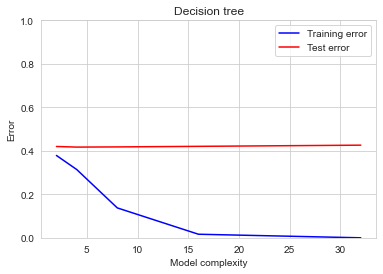

In [160]:
complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Test error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

For the Logistic Regression, Decision Tree a grid search cross-validation was performed to find the best parameters using the .get_params_ method. These initial F1 accuracy scores were then compared to the optimized models (using best parameters) scores. 

The optimized Logistic Regression experienced a growth in accuracy for both classification labels, with a marginal increase in overall F1 score after optimization.

The Decision Tree failed to optimize with the grid search cross validation and also by selecting a model by looking at decline in RMSE. Other permutations were tested with very little variation, and none was upward in F1 score. While the RMSE leveled out after greater depth, the accuracy score did not increase. As such, this model was dropped from the final analysis. 

The KNN model optimized between values of 5 (the default) and up to 30 using the elbow method of plotting RMSE as seen in Figure 4 . However, while accuracy of classifying 0 or 1 increased, overall F1 accuracy did not significantly increase. 

### Hypothesis Testing Between Models

Given the inability to further optimize the Decision Tree models, it is subsequently dropped from the final comparison. While the RMSE on Decision Tree model did eventually decline to ~0.1, the accuracy results did not increase with further model complexity.
As such, the only two models for consideration became the KNN against the Logistic Regression. Before these comparisons were carried out, the two models were tested for reliability using the chi-squared test to see if the model’s performance could be random.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=369)

In [164]:
y_pred_lr = logreg_opt.predict(X_test)
y_pred__lr1 = pd.Series(y_pred_lr, name='Predicted')
y_pred__lr1

0      1
1      0
2      1
3      1
4      1
      ..
594    1
595    0
596    1
597    1
598    0
Name: Predicted, Length: 599, dtype: int64

In [166]:
y_pred_frst = knn.predict(X_test)
y_pred__frst2 = pd.Series(y_pred_frst, name='Predicted')
y_pred__frst2

0      1
1      1
2      1
3      1
4      1
      ..
594    1
595    1
596    1
597    1
598    1
Name: Predicted, Length: 599, dtype: int64

In [167]:
y_actu = pd.Series(y_test, name='Actual')
y_actu

853     1
131     0
1666    0
1938    0
112     1
       ..
653     1
1475    0
553     1
590     1
698     0
Name: Actual, Length: 599, dtype: category
Categories (2, int64): [0 < 1]

In [168]:
confusion_s1 = pd.crosstab(y_actu, y_pred__lr1)
print(confusion_s1)
print()
confusion_s2 = pd.crosstab(y_actu, y_pred__frst2)
print(confusion_s2)

Predicted   0   1
Actual           
0          64  46
1          41  35

Predicted  0    1
Actual           
0          7  103
1          6   70


In [169]:
from collections import Counter

def class_distr(Y):
    return zip(*sorted(Counter(Y).items()))

actual_classes, actual_freqs = class_distr(y_actu)
sys1_classes, sys1_freqs = class_distr(y_pred__lr1)
sys2_classes, sys2_freqs = class_distr(y_pred__frst2)

bar_width = 0.2

_ = plt.bar([b-(1.5*bar_width) for b in actual_classes], actual_freqs, bar_width, color='green', label='Actual Test')
_ = plt.bar([b-(0.5*bar_width) for b in sys1_classes], sys1_freqs, bar_width, color='blue', label='LogReg')
_ = plt.bar([b+(0.5*bar_width) for b in sys2_classes], sys2_freqs, bar_width, color='indigo', label='K-Nearest-Neighbors')


plt.xticks([0,1], ['0 (less popular)', '1 (very popular hit)'])
plt.ylabel('Number of instances per label')

_ = plt.legend()

### Results of K-fold validation

In [170]:
import numpy as np
NUM_FOLDS = 10
Y_actu_folds = np.array_split(y_actu, NUM_FOLDS)
Y_sys1_folds = np.array_split(y_pred__lr1, NUM_FOLDS)
Y_sys2_folds = np.array_split(y_pred__frst2, NUM_FOLDS)

freq = Counter(Y_actu_folds[0])
print (freq)

Counter({0: 34, 1: 26})


In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

PRF_KWARGS = {
    'pos_label': 1,     # 1 is the big hit label
    'average': 'binary' # evaluate p/r/f of the positive label
}

Ya0 = Y_actu_folds[0]
Y10 = Y_sys1_folds[0] 
Y20 = Y_sys2_folds[0]

y_actu = pd.Series(Ya0, name='Actual')
y_pred_s1 = pd.Series(Y10, name='Predicted')
y_pred_s2 = pd.Series(Y20, name='Predicted')
confusion_s1 = pd.crosstab(y_actu, y_pred_s1)

print("System 1 accuracy:", accuracy_score(Ya0, Y10))
print("System 2 accuracy:", accuracy_score(Ya0, Y20))
print("System 1 f1 score:", f1_score(Ya0, Y10, **PRF_KWARGS))
print("System 2 f1 score:", f1_score(Ya0, Y20, **PRF_KWARGS))

System 1 accuracy: 0.6833333333333333
System 2 accuracy: 0.5
System 1 f1 score: 0.6779661016949152
System 2 f1 score: 0.625


Finally, the two models were compared against each other using a paired t-test to test our initial H0 that the Logistic Regression model is significantly better at predicting popularity than other models. Using K-fold cross validation, the final data of both models was split into 10 folds each and a t-test across folds for the mean F1 score yielded the following results:

H0: Logistic Regression mean F1 score > KNN mean F1 score